In [29]:
# Importing Dependencies
import pandas as pd
import requests
from bs4 import BeautifulSoup
import Links as ls

In [16]:
# Importing Batting URLs
# print(ls.Team_Batting_2007_url)

In [17]:
# url = ls.Team_Batting_2024_url
# response= requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')
# tb = soup.find("table",id='team_batting')
# df = pd.read_html(str(tb))[0]
# df.head(5)

In [18]:
# url = ls.Team_Batting_2007_url
# response= requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')
# tb = soup.find("table",id='team_batting')
# df = pd.read_html(str(tb))[0]
# df.head(21)


In [19]:
def get_batting_table(x,y):
    url = x
    response=requests.get(url)
    soup= BeautifulSoup(response.content, 'html.parser')
    tb = soup.find("table",id=y)
    df = pd.read_html(str(tb))[0]
    
    for col in df.columns:
        if col == "Pos":
            pass
        elif col == "Name":
            pass
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    df.dropna(inplace=True)
    return df


In [20]:
batting_2007= get_batting_table(ls.Team_Batting_2007_url,"team_batting")
batting_2024=get_batting_table(ls.Team_Batting_2024_url,"team_batting")
# batting_2007.dtypes

C:\Users\cassy\AppData\Local\Temp\ipykernel_15520\550940099.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tb))[0]
C:\Users\cassy\AppData\Local\Temp\ipykernel_15520\550940099.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tb))[0]


In [21]:
batting_2007=batting_2007.head(21)
batting_2007

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1.0,C,Yorvit Torrealba,28.0,113.0,443.0,396.0,47.0,101.0,22.0,...,0.323,0.376,0.699,76.0,149.0,19.0,6.0,6.0,1.0,1.0
1,2.0,1B,Todd Helton*,33.0,154.0,682.0,557.0,86.0,178.0,42.0,...,0.434,0.494,0.928,133.0,275.0,15.0,2.0,0.0,7.0,16.0
2,3.0,2B,Kazuo Matsui#,31.0,104.0,453.0,410.0,84.0,118.0,24.0,...,0.342,0.405,0.746,87.0,166.0,1.0,0.0,8.0,1.0,1.0
3,4.0,SS,Troy Tulowitzki,22.0,155.0,682.0,609.0,104.0,177.0,33.0,...,0.359,0.479,0.838,109.0,292.0,14.0,9.0,5.0,2.0,3.0
4,5.0,3B,Garrett Atkins,27.0,157.0,684.0,605.0,83.0,182.0,35.0,...,0.367,0.486,0.853,113.0,294.0,16.0,2.0,0.0,10.0,3.0
5,6.0,LF,Matt Holliday,27.0,158.0,713.0,636.0,120.0,216.0,50.0,...,0.405,0.607,1.012,151.0,386.0,23.0,10.0,0.0,4.0,7.0
6,7.0,CF,Willy Taveras,25.0,97.0,408.0,372.0,64.0,119.0,13.0,...,0.367,0.382,0.748,89.0,142.0,1.0,7.0,7.0,1.0,0.0
7,8.0,RF,Brad Hawpe*,28.0,152.0,606.0,516.0,80.0,150.0,33.0,...,0.387,0.539,0.926,130.0,278.0,13.0,3.0,1.0,5.0,11.0
9,9.0,CF,Ryan Spilborghs,27.0,97.0,300.0,264.0,40.0,79.0,14.0,...,0.363,0.485,0.848,111.0,128.0,5.0,2.0,0.0,6.0,1.0
10,10.0,2B,Jamey Carroll,33.0,108.0,268.0,227.0,45.0,51.0,9.0,...,0.317,0.300,0.616,57.0,68.0,2.0,4.0,6.0,3.0,1.0


In [30]:
batting_2007.plot(x="Name",
                  y="OBP",
                  kind="bar",
                  title="Player v On Base Percentage, 2007 Rockies",
                  ylabel="On Base Percentage (OBP)",
                  xlabel="Player",
                  figsize= [20,10],
                  color=ls.Rockies_Purple_Hex)

AttributeError: module 'Links' has no attribute 'Rockies_Purple_Hex'

<Axes: title={'center': 'Player v On Base Percentage, 2024 Rockies'}, xlabel='Player', ylabel='On Base Percentage (OBP)'>

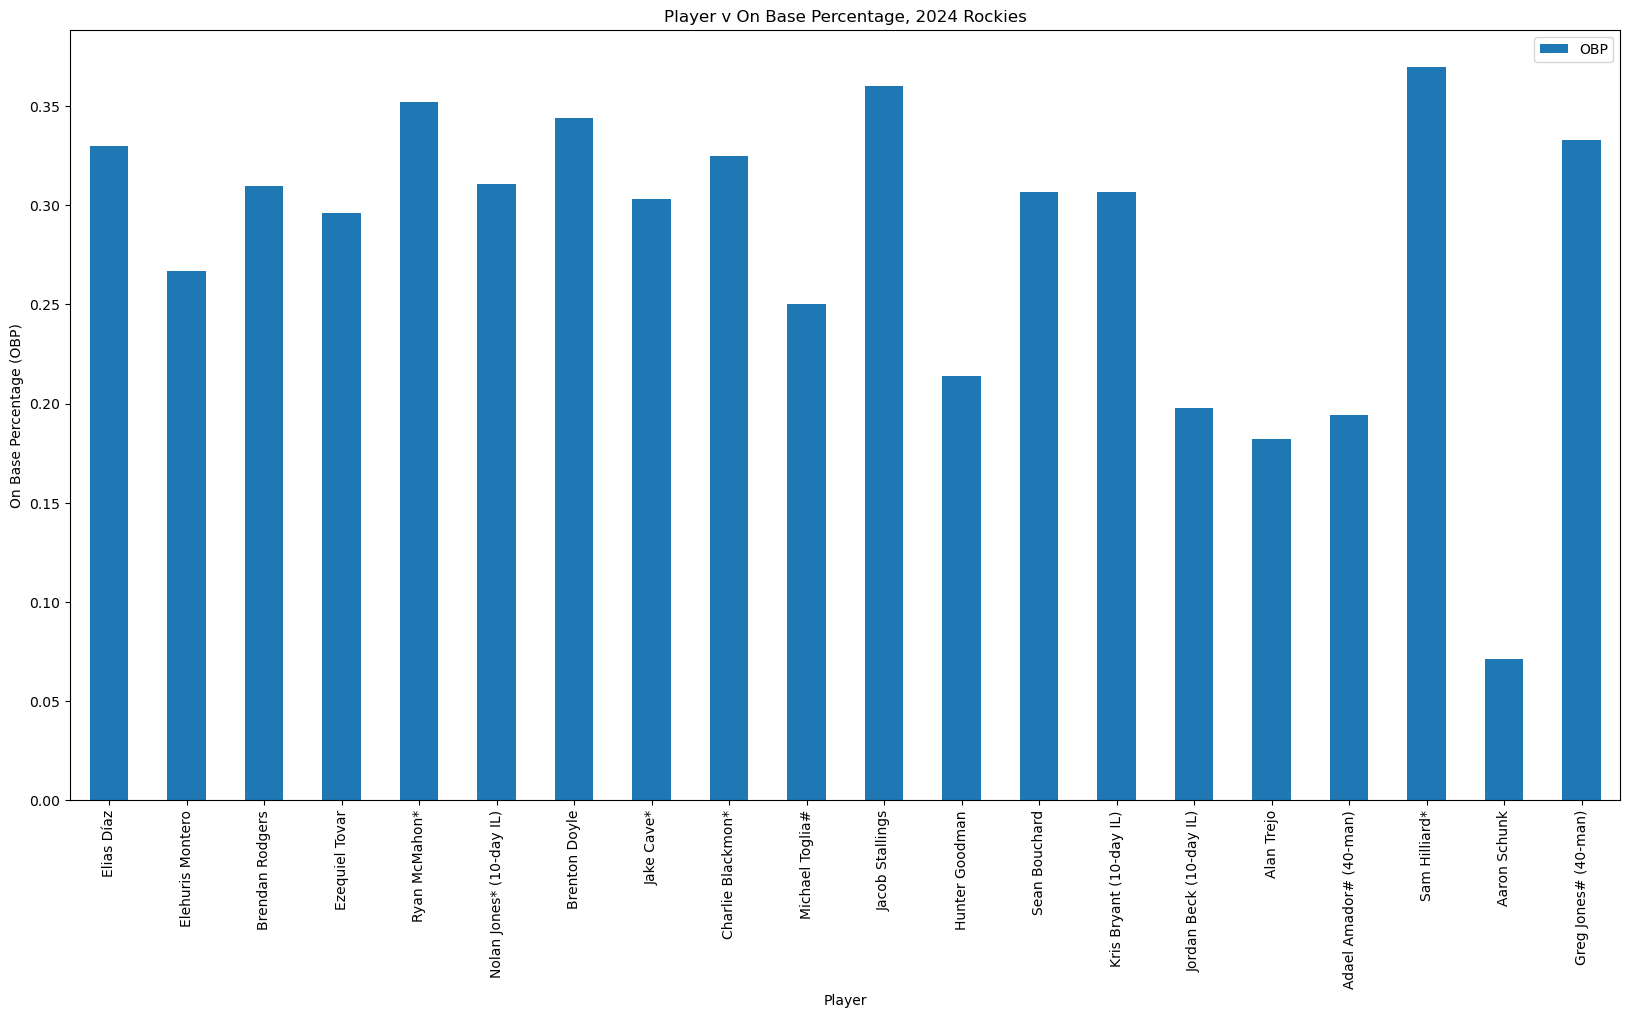

In [13]:
batting_2024.plot(x="Name",
                  y="OBP",
                  kind="bar",
                  title="Player v On Base Percentage, 2024 Rockies",
                  ylabel="On Base Percentage (OBP)",
                  xlabel="Player",
                  figsize= [20,10])